Import thingies first.

In [139]:
import pandas as pd
import numpy as np
import json
import requests
import urllib
import pandas.io.json
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt

Now we need to get the data. 
Initially, I was going to use LoL/Overwatch/FortNite's API data, but it wasn't enough to make any meaningful conclusions. 
I kept looking, and eventually found DOTA 2's APIs, which had some kind of data that would yield results that actually made some sense.

In [154]:
############ ***Change hero_id in url to hero you're interested in*** ############
############ I like hero no.30, "Witch Doctor"

#Read the API
url = 'https://api.opendota.com/api/scenarios/laneRoles?hero_id=30'
heroes = 'https://api.opendota.com/api/heroes'
#hero_stats = 'https://api.opendota.com/api/heroStats' ### NOT USED ###
response = urllib.request.urlopen(url)
hresponse = urllib.request.urlopen(heroes)
#hsresponse = urllib.request.urlopen(hero_stats)
responseText = response.read()
hresponseText = hresponse.read()
#hsresponseText = hsresponse.read()

Now that we have the data, we need to change it into dataframes, so that we can actually do something with it.
I have hero stats data, but it's not really needed to make the graphs I want to make.

In [155]:
#Make Dataframes
data = json.loads(responseText)
hdata = json.loads(hresponseText)
hsdata = json.loads(hsresponseText) ### NOT USED ###

Now the data has to become usable, so we need to normalize it.
Afterwards, look through the (now-legible) data, choose a hero, find its ID, and apply it to the url above.
I like the witch doctor, which has the id of 30 as shown in the output below.
Keep in mind, there are 120 individual heroes to choose from, and each has different statistics.

In [156]:
#Normalize 
df = json_normalize(data)
hdf = json_normalize(hdata)
#hsdf = json_normalize(hsdata)      ### NOT USED ###
hdf[20:35]                          #prints data about heroes
#print(hdf["localized_name"])        #prints only localized_name column
#heroList = hdf['localized_name'].tolist()  #creates list of heroes
#heroList                                   #prints hero names as a list

,attack_type,id,legs,localized_name,name,primary_attr,roles
20,Ranged,21,2,Windranger,npc_dota_hero_windrunner,int,"[Carry, Support, Disabler, Escape, Nuker]"
21,Ranged,22,2,Zeus,npc_dota_hero_zuus,int,[Nuker]
22,Melee,23,2,Kunkka,npc_dota_hero_kunkka,str,"[Carry, Support, Disabler, Initiator, Durable,..."
23,Ranged,25,2,Lina,npc_dota_hero_lina,int,"[Support, Carry, Nuker, Disabler]"
24,Ranged,26,2,Lion,npc_dota_hero_lion,int,"[Support, Disabler, Nuker, Initiator]"
25,Ranged,27,2,Shadow Shaman,npc_dota_hero_shadow_shaman,int,"[Support, Pusher, Disabler, Nuker, Initiator]"
26,Melee,28,0,Slardar,npc_dota_hero_slardar,str,"[Carry, Durable, Initiator, Disabler, Escape]"
27,Melee,29,2,Tidehunter,npc_dota_hero_tidehunter,str,"[Initiator, Durable, Disabler, Nuker]"
28,Ranged,30,2,Witch Doctor,npc_dota_hero_witch_doctor,int,"[Support, Nuker, Disabler]"
29,Ranged,31,2,Lich,npc_dota_hero_lich,int,"[Support, Nuker]"


Now we need to do something cool. Since I like the witch doctor [id 30], the url looks like this: 
url = 'https://api.opendota.com/api/scenarios/laneRoles?hero_id=30'
There are 4 lanes in each match, and you need to battle through the lanes in order to claim victory.
As time progresses, your chances of winning vary, depending on what lane you're in. 
This data can be found in the above url, and is based on your hero's id.

Let's first look at what data is contained in that link:

In [159]:
df

,games,hero_id,lane_role,time,wins
0,2030,30,1,900,964
1,1868,30,2,900,807
2,1105,30,3,900,396
3,53,30,4,900,18
4,22228,30,1,1800,11460
5,2251,30,2,1800,1021
6,7819,30,3,1800,4093
7,229,30,4,1800,123
8,41938,30,1,2700,20798
9,2507,30,2,2700,1150


There are 5 intervals of time, 4 lanes, a number of wins, and a total number of games played.
This means, that for each lane, we can get a win rate % (wins/games * 100), at each time interval.

In [166]:
for lane in df['lane_role'].unique():
#Define X and Y axis of line graph
  x = (df[df.lane_role == lane]['time'])/60
  y = ((df[df.lane_role == lane]['wins']).astype(float)/(df[df.lane_role == lane]['games']).astype(float))*100
  print('--------------')
  print(lane)
  print('--------------')
  print('Duration (minutes)')
  print(x)
  print('Win Rate (percentage))')
  print(y)

--------------
1
--------------
Duration (minutes)
0     15.0
4     30.0
8     45.0
12    60.0
16    90.0
Name: time, dtype: float64
Win Rate (percentage))
0     47.487685
4     51.556595
8     49.592255
12    49.230919
16    49.540852
dtype: float64
--------------
2
--------------
Duration (minutes)
1     15.0
5     30.0
9     45.0
13    60.0
17    90.0
Name: time, dtype: float64
Win Rate (percentage))
1     43.201285
5     45.357619
9     45.871560
13    46.780303
17    52.709360
dtype: float64
--------------
3
--------------
Duration (minutes)
2     15.0
6     30.0
10    45.0
14    60.0
18    90.0
Name: time, dtype: float64
Win Rate (percentage))
2     35.837104
6     52.346847
10    50.176394
14    46.939191
18    45.330739
dtype: float64
--------------
4
--------------
Duration (minutes)
3     15.0
7     30.0
11    45.0
15    60.0
19    90.0
Name: time, dtype: float64
Win Rate (percentage))
3     33.962264
7     53.711790
11    52.671756
15    49.504950
19    37.500000
dtype: floa

This isn't very pretty to look at, so let's stick it all into a graph for easier comparison

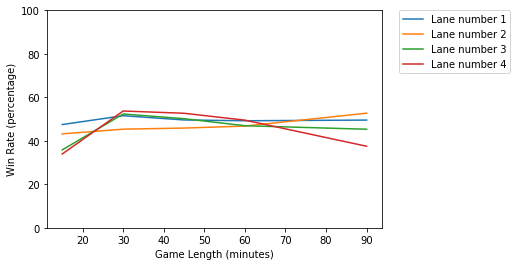

In [168]:
for lane in df['lane_role'].unique():
#Define X and Y axis of line graph
  x = (df[df.lane_role == lane]['time'])/60
  y = ((df[df.lane_role == lane]['wins']).astype(float)/(df[df.lane_role == lane]['games']).astype(float))*100
  plt.plot(x, y, label="Lane number {}".format(lane))
  plt.ylim(0, 100) 
#plt.title("Lane number {}".format(lane))
plt.xlabel('Game Length (minutes)')
plt.ylabel('Win Rate (percentage)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In conslusion, we can see that as a witch doctor, depending on what lane you are in, and what length of time has passed, your chances of winning vary. 
At 30 minutes into the game you have a high chance of winning if you're in lane 4, but that drops as you get closer to the end of the game.
If you start out in lane 2, and choose to remain in lane 2 throughout the game, your chances of winning slowly rise.
To see other heroes' win rates, simply find their ID in hdf, apply it to the URL, and run the code again. Yay \o/